## Activity: Going through a machine learning problem yourself

In [23]:
import pandas as pd
import numpy as np

### Task: Predict House Prices in Iowa

Original Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Note: There are 81 columns in the original dataset, I have reduced it to 14 columns to make it easier to work with. 

### What type of machine learning problem is this and why? (i.e. Supervised, Unsupervised, or Reinforcement?) 

Answer: This is a supervised machine learning regression problem because we are trying to predict the sales price of a house by training a model on a labelled dataset.

In [24]:
# read in the data
iowa = pd.read_csv('https://raw.githubusercontent.com/shailm99/intro2ML/main/iowa_modified.csv', index_col = 'Id')
iowa.head()

,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageCars,PoolArea,SalePrice
Id,,,,,,,,,,,,,,
1,8450,CollgCr,7,5,2003,706,856,1710,2,1,8,2,0,208500
2,9600,Veenker,6,8,1976,978,1262,1262,2,0,6,2,0,181500
3,11250,CollgCr,7,5,2001,486,920,1786,2,1,6,2,0,223500
4,9550,Crawfor,7,5,1915,216,961,1717,1,0,7,3,0,140000
5,14260,NoRidge,8,5,2000,655,1145,2198,2,1,9,3,0,250000


In [25]:
iowa.shape

(1460, 14)

### Columns in the Dataset

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- LotArea: Lot size in square feet
- Neighborhood: Physical locations within Ames city limits
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- BsmtFinSF1: Type 1 finished square feet
- 1stFlrSF: First Floor square feet
- GrLivArea: Above grade (ground) living area square feet
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageCars: Size of garage in car capacity
- PoolArea: Pool area in square feet


### Step 1: Model Preprocesssing

##### 1) Feature Selection/Engineering 

Remember you should always explore your data first, perform feature engineering and select the best features to get the best model possible 

However, in order to save some time we will use the features given in this dataset

In [26]:
# Split data in X and y

X = iowa.drop(columns  = ['SalePrice'])
y = iowa['SalePrice']   

##### 2) Split data into train-test split

In [27]:
# import the respective function from sklearn
from sklearn.model_selection import train_test_split

# create a 75/25 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

##### 3) Check for any missing values 

Hint: there should not be any missing values

In [28]:
# write your code here 
print(X_train.isnull().sum())
print(X_test.isnull().sum())

LotArea         0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
BsmtFinSF1      0
1stFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
GarageCars      0
PoolArea        0
dtype: int64
LotArea         0
Neighborhood    0
OverallQual     0
OverallCond     0
YearBuilt       0
BsmtFinSF1      0
1stFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
GarageCars      0
PoolArea        0
dtype: int64


##### 4) Handle Categorical Data using One Hot Encoding

Remember to handle the categorical data for both the training and testing datasets

In [29]:
# write your code here 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##### 5) Normalize the following columns:
- BsmtFinSF1
- 1stFlrSF
- GrLivArea
- LotArea

In [30]:
# import the MinMaxScaler Class for Sklearn
from sklearn.preprocessing import MinMaxScaler
# create an instance of the class 
scaler = MinMaxScaler()
# fit and transform the training data
X_train[['BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'LotArea']] = scaler.fit_transform(X_train[['BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'LotArea']])
# transform the testing data
X_test[['BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'LotArea']] = scaler.transform(X_test[['BsmtFinSF1', '1stFlrSF', 'GrLivArea', 'LotArea']])


### Step 2: Model Fitting

Choose one model and fit it to the data (I would recommend using XGBoost Regressor or RandomForestRegressor)

Optional: Fit more than one model and compare them using K-Fold Cross Validation (I recommend only doing this if you have extra time)

In [31]:
# import the model 
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 1)

# fit the model to the training data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# additional code block if you have time for the optional challenge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, scoring = 'r2')
print(np.mean(cv))

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.7528740117059577


In [33]:
# additional code block if you have time for the optional challenge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
cv =  cross_val_score(xgb, X_train, y_train, scoring = 'r2')
print(np.mean(cv))

0.8177549978581187


### Step 3: Evaluate the Model
Find the RMSE of your model when applying it to the testing set

In [34]:
# import the metrics from sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# make predictions of the testing data 
preds = xgb.predict(X_test)

# find the R^2, MSE and MAE of the model
print("The Mean Absolute Error is: {}".format(mean_absolute_error(y_test, preds)))
print("The Mean Squared Error is: {}".format(mean_squared_error(y_test, preds)))
print("The  R^2 is: {}".format(r2_score(y_test, preds)))

The Mean Absolute Error is: 16270.69609375
The Mean Squared Error is: 591555125.1713272
The  R^2 is: 0.9118821643188533


### Step 4: Model Interpretability 

What are the top 3 most important features in your model to predict the Sales Price of a House?

Answer: Overall Quality, Number of Garage Cars, and Old Town Neighbourhood

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

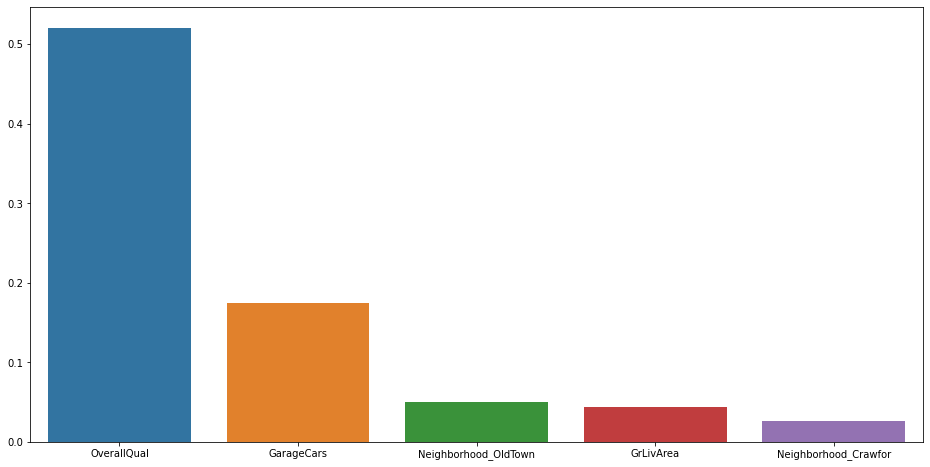

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# write your code here
plt.figure(figsize = (16,8))
index = np.argsort(xgb.feature_importances_)[-1::-1][:5] # top 5
sns.barplot(X_train.columns[index], xgb.feature_importances_[index])

In [ ]:
np.max(y_train) - np.min(y_train)

### Extra Time: Applying a Log Transformation to Sale Prices

Since the range for SalePrices is very large we will apply a log transformation and refit our model to see if we can achieve better results

In [ ]:
# Notice that the range of Sale Prices are very large 
np.max(y_train) - np.min(y_train)

In [ ]:
# apply log transformation
# write your code here
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
# refit the model 
xgb.fit(X_train, y_train)
# make predictions on testing set 
preds = xgb.predict(X_test)

# Find R^2 of the model
print("The Mean Absolute Error is: {}".format(mean_absolute_error(y_test, preds)))
print("The Mean Squared Error is: {}".format(mean_squared_error(y_test, preds)))
print("The  R^2 is: {}".format(r2_score(y_test, preds)))

Notice how model buliding is a very experimental process. We can try many things, some will improve the model, while others may not be as good to the model